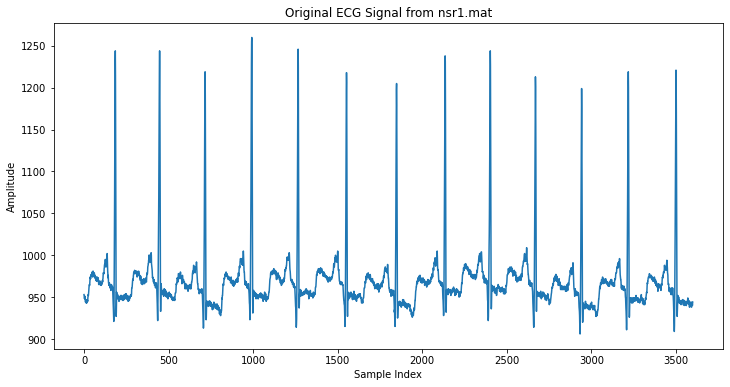

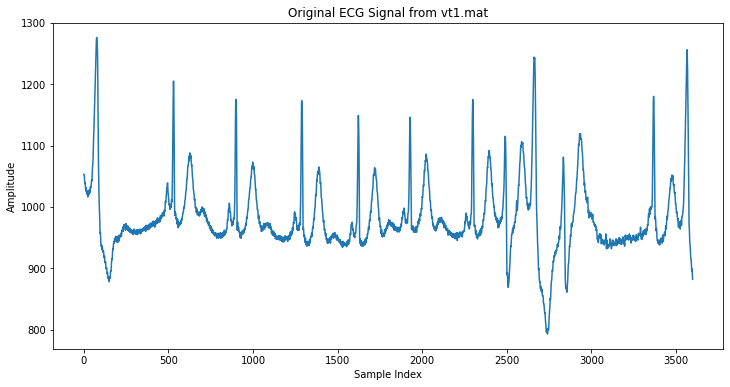

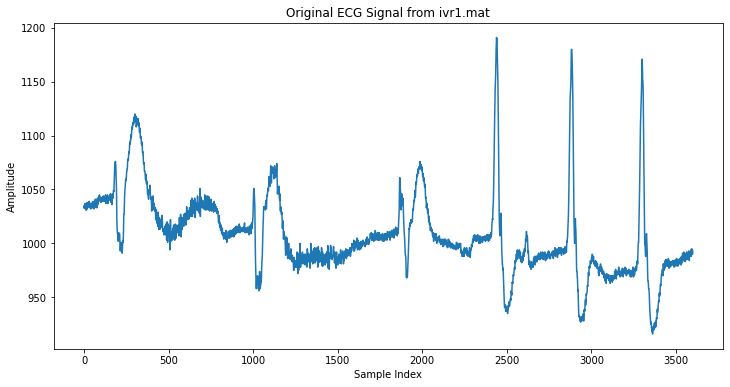

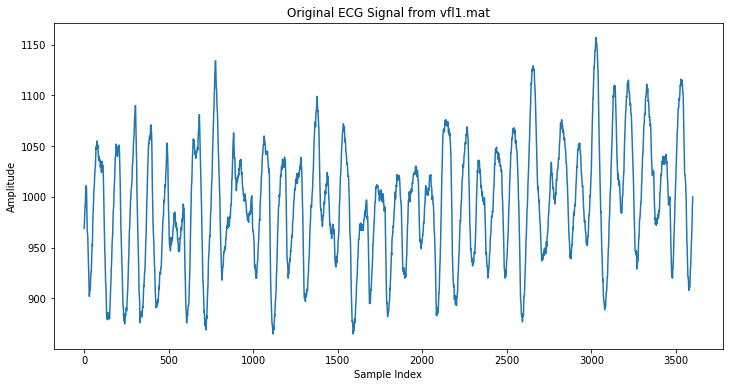

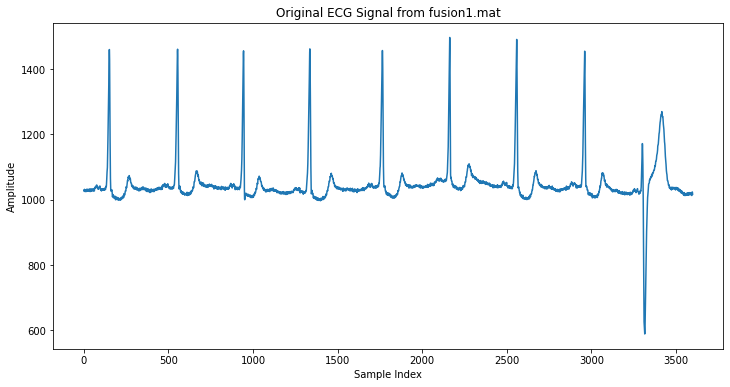

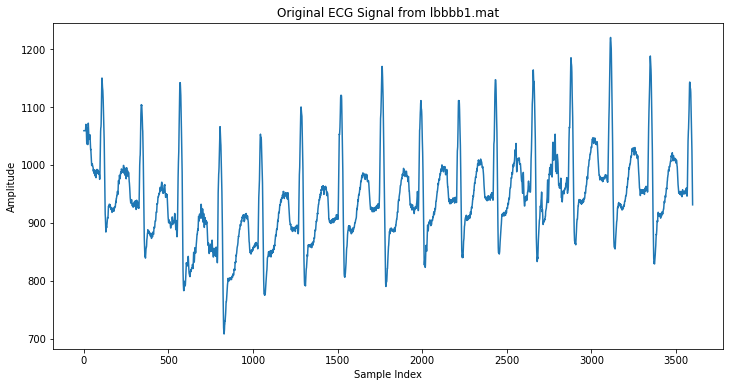

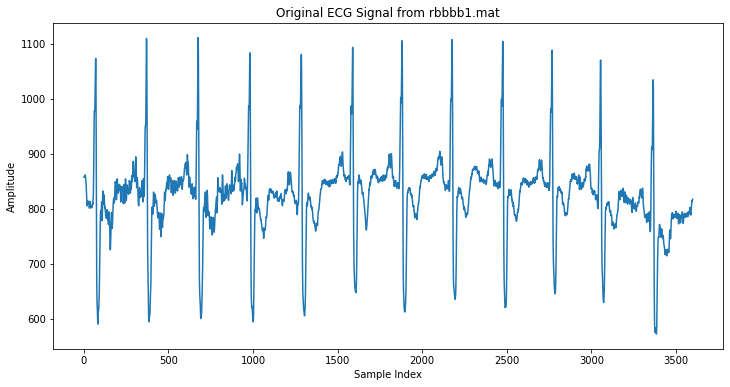

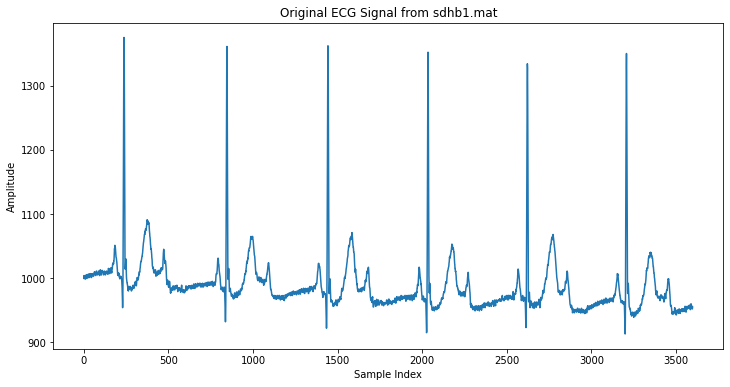

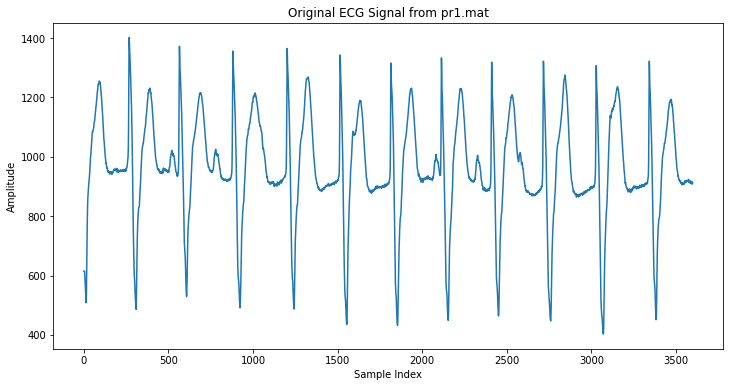

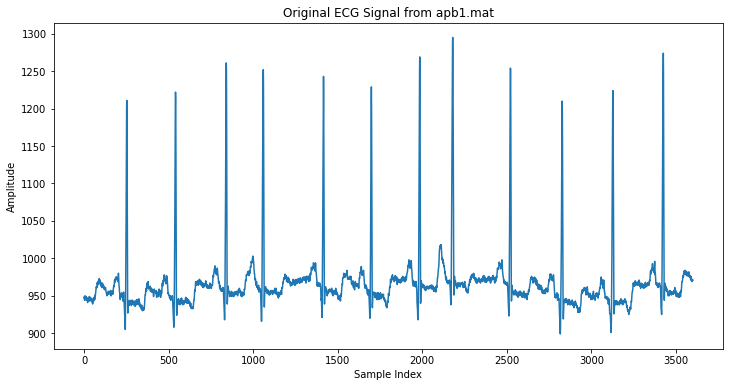

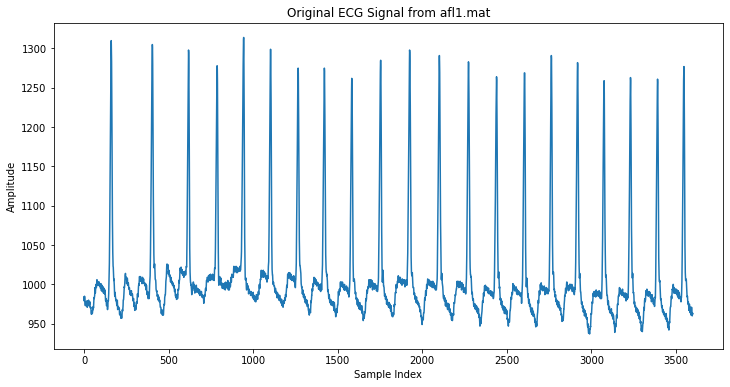

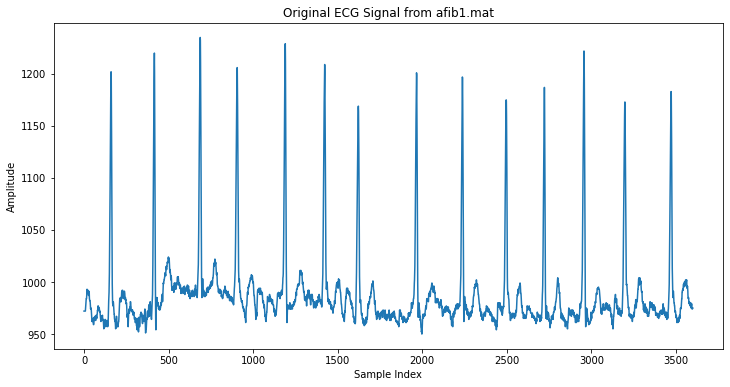

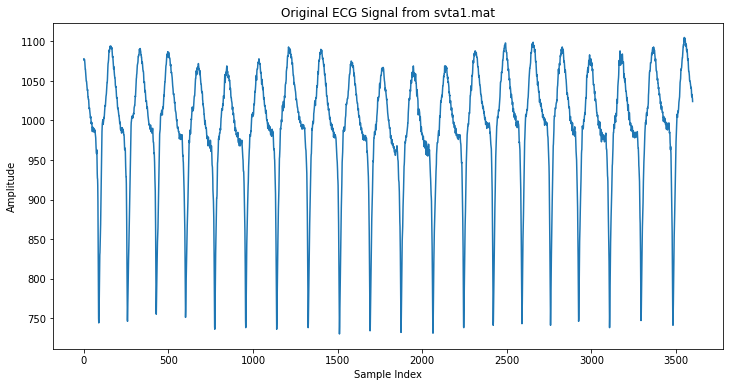

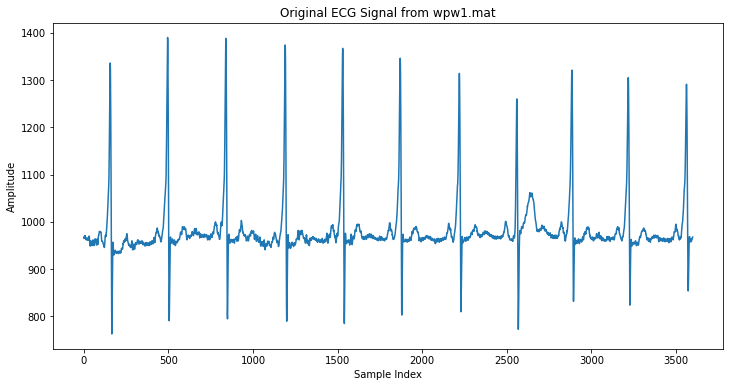

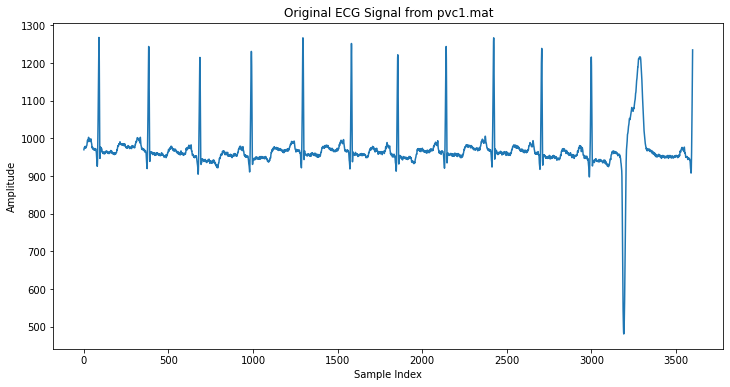

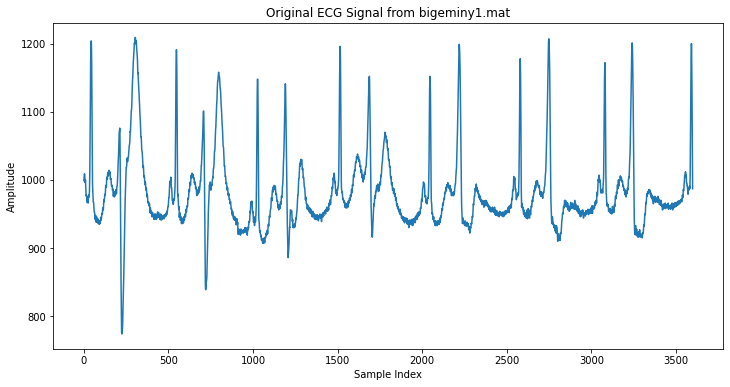

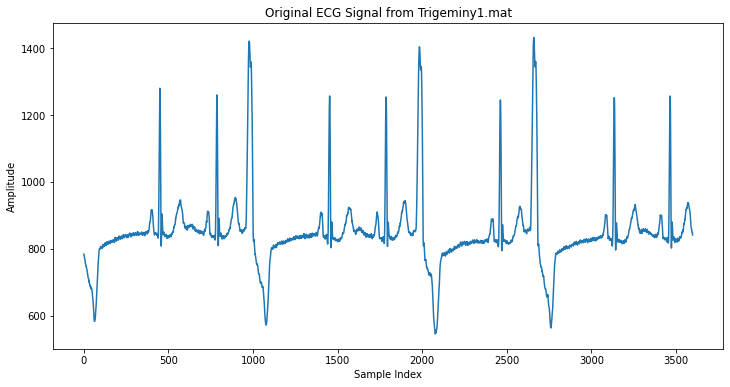

In [1]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Chemin absolu vers le dossier contenant les fichiers .mat
data_path = 'C:/Users/dell/OneDrive/Bureau/mastere2/projet_fin_etude/traitement_ecg/MLII'  # Remplacez par le chemin réel vers votre dossier

# Fonction pour charger un fichier .mat et afficher le signal
def load_and_plot_mat(file_path):
    mat = scipy.io.loadmat(file_path)
    signal = mat['val'][0]  # Assurez-vous que c'est la bonne clé pour accéder au signal
    
    # Afficher le signal
    plt.figure(figsize=(12, 6))
    plt.plot(signal)
    plt.title('Original ECG Signal from ' + os.path.basename(file_path))
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()

# Parcourir les sous-dossiers pour charger et afficher les données
for class_dir in os.listdir(data_path):
    class_path = os.path.join(data_path, class_dir)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            if file_name.endswith('.mat'):
                file_path = os.path.join(class_path, file_name)
                load_and_plot_mat(file_path)
                break  # Afficher seulement un fichier par classe pour l'exploration initiale


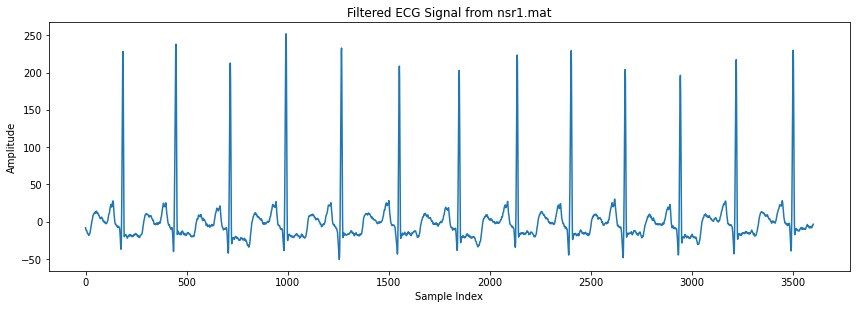

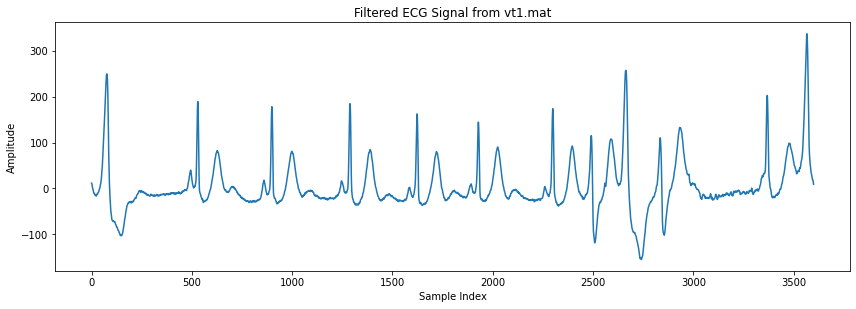

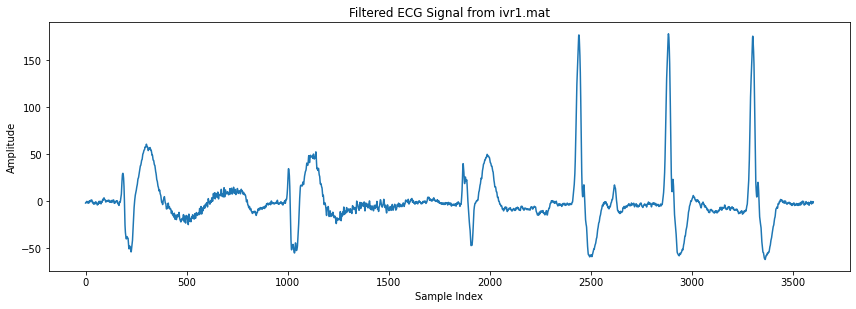

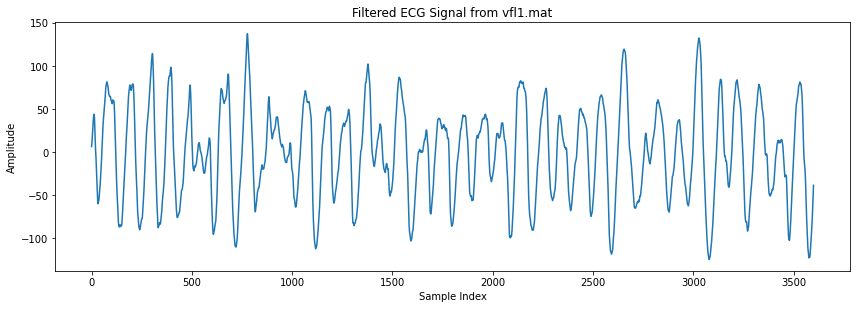

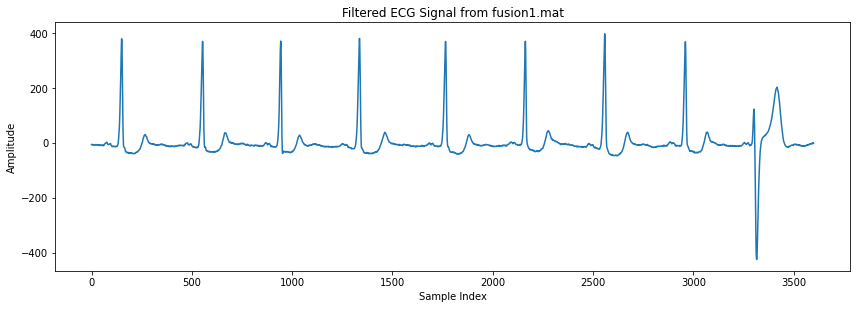

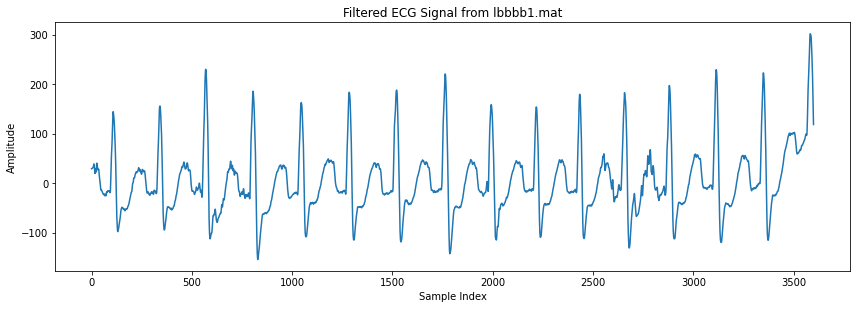

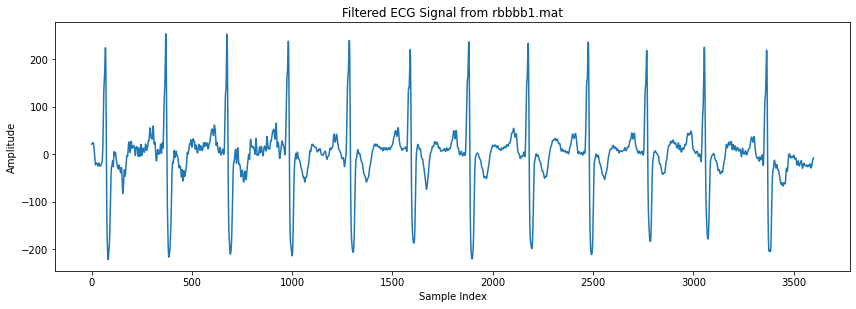

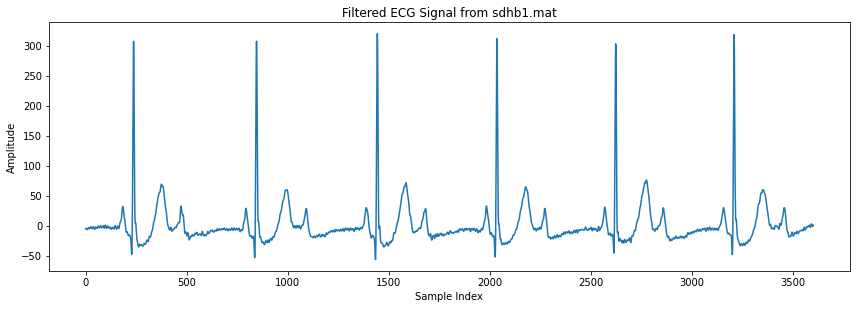

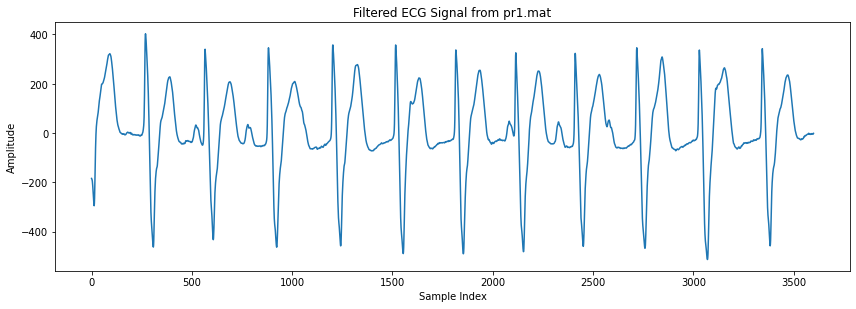

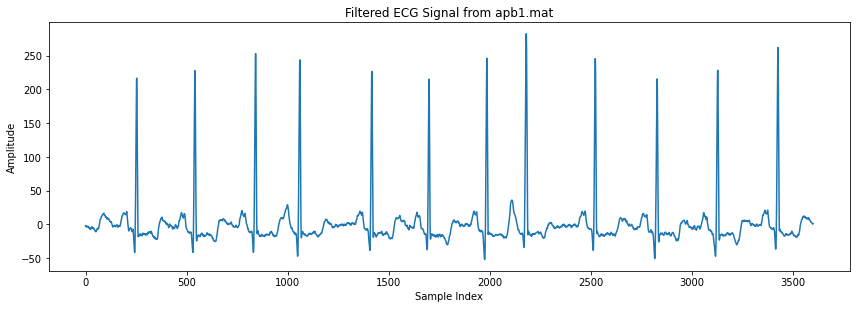

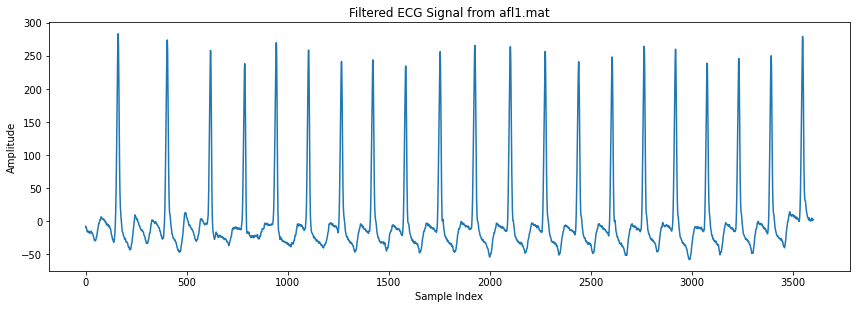

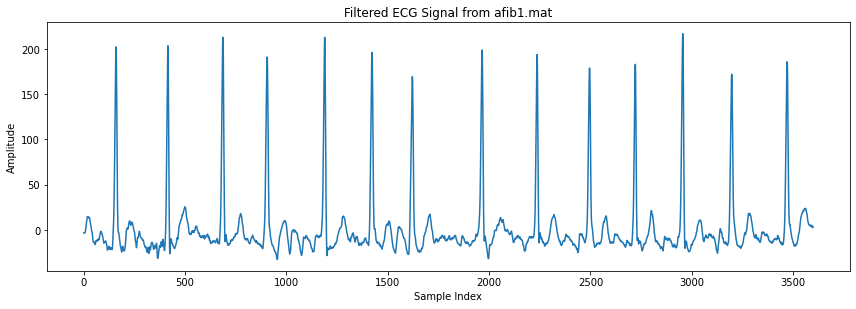

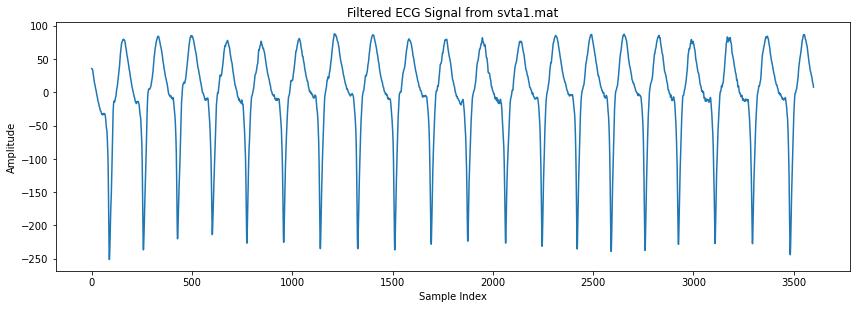

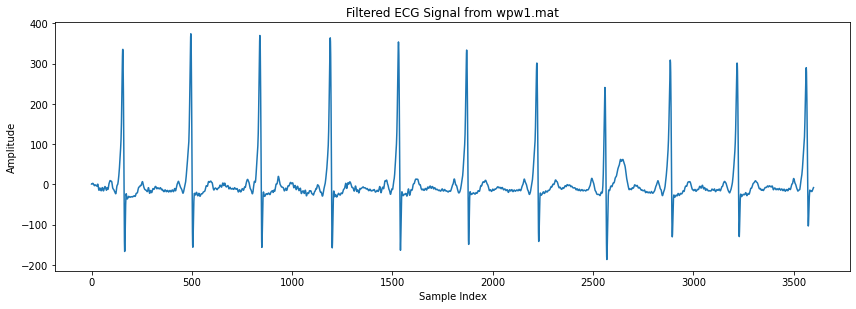

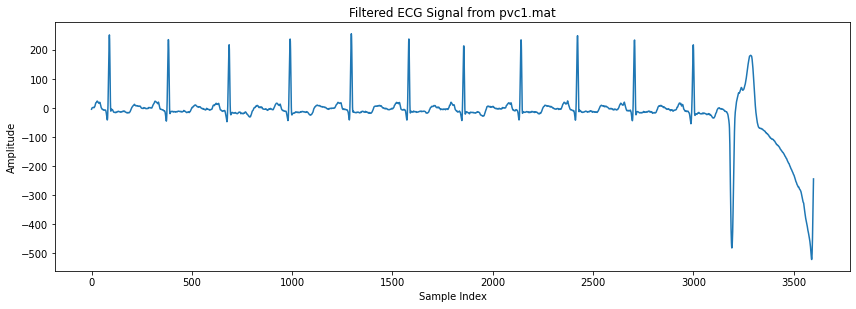

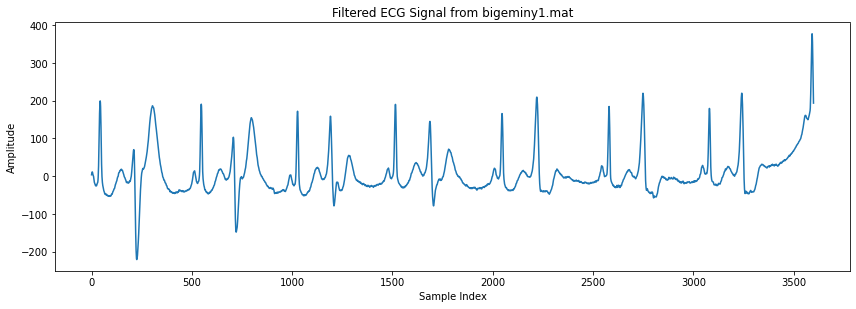

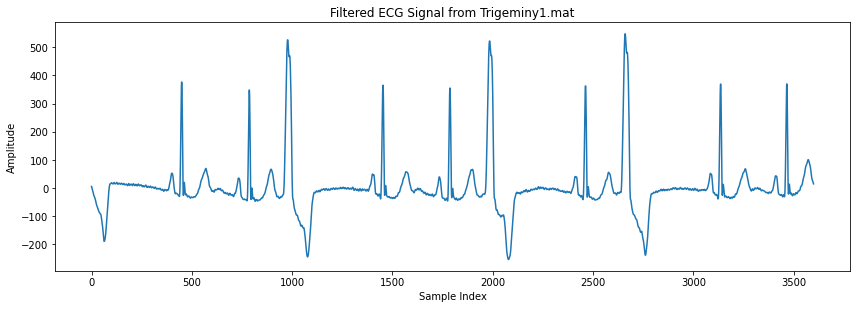

In [2]:
import os
import numpy as np
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt

# Chemin absolu vers le dossier contenant les fichiers .mat d'origine
data_path = 'C:/Users/dell/OneDrive/Bureau/mastere2/projet_fin_etude/traitement_ecg/MLII'  # Remplacez par le chemin réel vers votre dossier
# Chemin vers le dossier où les fichiers filtrés seront enregistrés
output_path = 'C:/Users/dell/OneDrive/Bureau/mastere2/projet_fin_etude/traitement_ecg/MLII_filtre'  # Remplacez par le chemin réel vers votre dossier

# Fonction pour appliquer un filtre passe-bas et passe-haut à un signal
def apply_filters(signal, fs, lowcut=0.5, highcut=45.0):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    # Filtre passe-haut
    b, a = scipy.signal.butter(1, low, btype='high')
    filtered_signal = scipy.signal.filtfilt(b, a, signal)

    # Filtre passe-bas
    b, a = scipy.signal.butter(1, high, btype='low')
    filtered_signal = scipy.signal.filtfilt(b, a, filtered_signal)

    return filtered_signal

# Fonction pour charger un fichier .mat, appliquer les filtres, afficher et enregistrer le signal
def load_filter_plot_and_save_mat(file_path, output_path, display=False):
    mat = scipy.io.loadmat(file_path)
    signal = mat['val'][0]  # Assurez-vous que c'est la bonne clé pour accéder au signal
    fs = 360.0  # Fréquence d'échantillonnage (Hz)
    
    # Appliquer les filtres
    filtered_signal = apply_filters(signal, fs)

    # Afficher les signaux
    if display:
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 1, 1)
        plt.plot(filtered_signal)
        plt.title('Filtered ECG Signal from ' + os.path.basename(file_path))
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')

        plt.tight_layout()
        plt.show()

    # Enregistrer le signal filtré dans un nouveau fichier .mat
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    # Créer le même sous-dossier dans le dossier de sortie
    relative_path = os.path.relpath(file_path, data_path)
    output_dir = os.path.join(output_path, os.path.dirname(relative_path))
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    output_file_path = os.path.join(output_dir, os.path.basename(file_path))
    scipy.io.savemat(output_file_path, {'val': filtered_signal})

# Parcourir les sous-dossiers pour charger, filtrer, afficher et enregistrer les données
for class_dir in os.listdir(data_path):
    class_path = os.path.join(data_path, class_dir)
    if os.path.isdir(class_path):
        first_file_displayed = False
        for file_name in os.listdir(class_path):
            if file_name.endswith('.mat'):
                file_path = os.path.join(class_path, file_name)
                load_filter_plot_and_save_mat(file_path, output_path, display=not first_file_displayed)
                if not first_file_displayed:
                    first_file_displayed = True


In [3]:
import os
import shutil
import random

def create_directories(base_path):
    train_dir = os.path.join(base_path, 'train')
    test_dir = os.path.join(base_path, 'test')
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)
    return train_dir, test_dir

def split_files(files, train_ratio=0.7):
    random.shuffle(files)
    split_index = int(len(files) * train_ratio)
    train_files = files[:split_index]
    test_files = files[split_index:]
    return train_files, test_files

def move_files(files, destination_dir):
    for file in files:
        shutil.move(file, destination_dir)

def process_directory(directory_path):
    # Créer les répertoires train et test
    train_dir, test_dir = create_directories(directory_path)

    # Obtenir la liste des fichiers .mat
    files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.mat')]

    # Diviser les fichiers en groupes train et test
    train_files, test_files = split_files(files)

    # Déplacer les fichiers dans les répertoires correspondants
    move_files(train_files, train_dir)
    move_files(test_files, test_dir)

def main(base_directory):
    # Parcourir chaque sous-dossier dans le répertoire de base
    for subdir in os.listdir(base_directory):
        subdir_path = os.path.join(base_directory, subdir)
        if os.path.isdir(subdir_path):
            process_directory(subdir_path)

# Chemin vers le dossier contenant les sous-dossiers avec les fichiers .mat
base_directory = r'C:/Users/dell/OneDrive/Bureau/mastere2/projet_fin_etude/traitement_ecg/MLII_filtre'

# Appeler la fonction principale pour traiter chaque sous-dossier
main(base_directory)


Error: Destination path 'C:/Users/dell/OneDrive/Bureau/mastere2/projet_fin_etude/traitement_ecg/MLII_filtre\1 NSR\train\nsr114.mat' already exists

In [ ]:
import os
import numpy as np
import scipy.io as sio
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Fonction pour charger les données à partir des fichiers .mat
def load_mat_files(folder):
    data = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".mat"):
            file_path = os.path.join(folder, filename)
            mat_contents = sio.loadmat(file_path)
            # Assurez-vous d'utiliser la bonne clé pour accéder aux données
            ecg_data = mat_contents['val'].squeeze()
            label = os.path.splitext(filename)[0]  # Utilise le nom de fichier comme étiquette
            data.append(ecg_data)
            labels.append(label)
    return np.array(data), np.array(labels)

# Fonction pour préparer les données (normalisation et mise en forme)
def preprocess_data(data):
    data = [d[:5000] if len(d) > 5000 else np.pad(d, (0, 5000 - len(d)), 'constant') for d in data]
    data = np.array(data)
    data = data.reshape((data.shape[0], data.shape[1], 1))
    return data

# Charger et préparer les données
train_folder = 'path/to/train'
test_folder = 'path/to/test'

X_train, y_train = load_mat_files(train_folder)
X_test, y_test = load_mat_files(test_folder)

X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Encoder les étiquettes
unique_labels = sorted(set(y_train))
label_to_int = {label: i for i, label in enumerate(unique_labels)}
y_train = np.array([label_to_int[label] for label in y_train])
y_test = np.array([label_to_int[label] for label in y_test])

# Convertir les étiquettes en format one-hot
y_train = to_categorical(y_train, num_classes=len(unique_labels))
y_test = to_categorical(y_test, num_classes=len(unique_labels))

### Création et Compilation du Modèle LSTM

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(len(unique_labels), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Entraînement du Modèle

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

### Évaluation du Modèle

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

### Sauvegarde et Chargement du Modèle

# Sauvegarder le modèle
model.save('ecg_lstm_model.h5')

# Charger le modèle
from keras.models import load_model
model = load_model('ecg_lstm_model.h5')


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'path/to/train'

In [ ]:
import os
import numpy as np
import scipy.io as sio

def load_and_preprocess_mat_files(folder):
    data = []
    labels = []
    max_length = 5000  # Longueur maximale de séquence à utiliser pour LSTM

    for filename in os.listdir(folder):
        if filename.endswith(".mat"):
            file_path = os.path.join(folder, filename)
            mat_contents = sio.loadmat(file_path)

            # Supposons que chaque fichier contient une matrice 1D avec les données ECG
            ecg_data = mat_contents.get('val', None)  # La clé à modifier selon le contenu du fichier .mat
            if ecg_data is None:
                continue

            # Charger l'étiquette à partir du nom du fichier
            label = os.path.splitext(filename)[0].split('1')[0]  # Extrait l'étiquette basée sur le nom du fichier
            
            # Traiter et remplir les données pour qu'elles aient une longueur fixe de 5000
            if len(ecg_data) > max_length:
                ecg_data = ecg_data[:max_length]
            else:
                ecg_data = np.pad(ecg_data, (0, max_length - len(ecg_data)), mode='constant')

            data.append(ecg_data)
            labels.append(label)

    data = np.array(data)
    labels = np.array(labels)

    return data, labels


In [ ]:
import os
import numpy as np
import scipy.io as sio

def load_and_preprocess_mat_files(folder):
    data = []
    labels = []
    max_length = 4000  # Longueur maximale de séquence à utiliser pour LSTM

    for filename in os.listdir(folder):
        if filename.endswith(".mat"):
            file_path = os.path.join(folder, filename)
            mat_contents = sio.loadmat(file_path)

            # Supposons que chaque fichier contient une matrice 1D avec les données ECG
            ecg_data = mat_contents.get('val', None)  # La clé à modifier selon le contenu du fichier .mat
            if ecg_data is None:
                continue

            # Charger l'étiquette à partir du nom du fichier
            label = os.path.splitext(filename)[0].split('1')[0]  # Extrait l'étiquette basée sur le nom du fichier
            
            # Traiter et remplir les données pour qu'elles aient une longueur fixe de 5000
            if len(ecg_data) > max_length:
                ecg_data = ecg_data[:max_length]
            else:
                ecg_data = np.pad(ecg_data, (0, max_length - len(ecg_data)), mode='constant')

            data.append(ecg_data)
            labels.append(label)

            # Affichage des résultats après traitement
            print(f"Processed file: {filename}")
            print(f"Data length: {len(ecg_data)}")
            print(f"Label: {label}")

    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Chemin du répertoire de fichiers .mat à charger
train_folder = 'C:\\Users\\dell\\OneDrive\\Bureau\\mastere2\\projet_fin_etude\\traitement_ecg\\train'

# Charger et préparer les données
X_train, y_train = load_and_preprocess_mat_files(train_folder)


MemoryError: Unable to allocate 232. MiB for an array with shape (4000, 7599) and data type float64

In [ ]:
import os
import numpy as np
import scipy.io as sio

def load_and_preprocess_data(folder, max_seq_length=5000):
    data = []
    labels = []

    # Parcourir les fichiers dans le répertoire
    for filename in os.listdir(folder):
        if filename.endswith(".mat"):
            # Charger les données ECG depuis le fichier .mat
            file_path = os.path.join(folder, filename)
            mat_contents = sio.loadmat(file_path)
            ecg_data = mat_contents['val'].squeeze()  # Supposons que 'val' est le nom de la variable contenant les données
            # Utiliser le nom de fichier comme étiquette
            label = ''.join(filter(str.isalpha, filename))

            # Traiter et normaliser les données
            if len(ecg_data) > max_seq_length:
                ecg_data = ecg_data[:max_seq_length]
            else:
                ecg_data = np.pad(ecg_data, (0, max_seq_length - len(ecg_data)), 'constant')

            # Normaliser entre -1 et 1
            ecg_data = (ecg_data - np.min(ecg_data)) / (np.max(ecg_data) - np.min(ecg_data)) * 2 - 1

            data.append(ecg_data)
            labels.append(label)

            print(f"Chargement du fichier : {filename}")
            print(f"Donnees pre-traitees : {ecg_data[:10]} ...")  # Afficher les 10 premiers échantillons de données

    # Convertir les données et les labels en numpy arrays
    data = np.array(data).reshape(-1, max_seq_length, 1)  # Reformat pour LSTM
    labels = np.array(labels)

    return data, labels

# Charger les données d'entraînement et de test
# Charger et préparer les données
train_folder = 'C:\\Users\\dell\\OneDrive\\Bureau\\mastere2\\projet_fin_etude\\traitement_ecg\\train'
test_folder = 'C:\\Users\\dell\\OneDrive\\Bureau\\mastere2\\projet_fin_etude\\traitement_ecg\\test'
X_train, y_train = load_and_preprocess_data(train_folder)
X_test, y_test = load_and_preprocess_data(test_folder)

# Encodage des étiquettes
unique_labels = sorted(set(y_train))
label_to_int = {label: i for i, label in enumerate(unique_labels)}
y_train = np.array([label_to_int[label] for label in y_train])
y_test = np.array([label_to_int[label] for label in y_test])

# Convertir les étiquettes en format one-hot
y_train = np.eye(len(unique_labels))[y_train]
y_test = np.eye(len(unique_labels))[y_test]

print(f"Sample of y_train labels: {y_train[:5]}")
print(f"Sample of y_test labels: {y_test[:5]}")



Chargement du fichier : afib1.mat
Donnees pre-traitees : [-0.7646692  -0.76489408 -0.76510244 -0.76526958 -0.76533488 -0.76515162
 -0.76436542 -0.76212062 -0.75635141 -0.74539075] ...
Chargement du fichier : afib10.mat
Donnees pre-traitees : [-0.7734292  -0.76996063 -0.76249617 -0.74717401 -0.72221171 -0.69330304
 -0.6714642  -0.65982627 -0.65623069 -0.6565962 ] ...
Chargement du fichier : afib11.mat
Donnees pre-traitees : [-0.86436159 -0.85105549 -0.8480132  -0.853652   -0.85945208 -0.85859248
 -0.84971646 -0.8373771  -0.826393   -0.81799386] ...
Chargement du fichier : afib12.mat
Donnees pre-traitees : [-0.84014698 -0.85373269 -0.86259045 -0.86676846 -0.86765636 -0.86913627
 -0.8738326  -0.88006141 -0.88565988 -0.88793555] ...
Chargement du fichier : afib13.mat
Donnees pre-traitees : [-0.70273948 -0.70668842 -0.70873794 -0.70715653 -0.69895484 -0.68790114
 -0.68239787 -0.68320827 -0.68583779 -0.68555365] ...
Chargement du fichier : afib14.mat
Donnees pre-traitees : [-0.84624204 -0.84

In [ ]:
# Exemple d'affichage des étiquettes one-hot générées
# Vous pouvez remplacer 'y_train' et 'y_test' par vos propres données.

# Afficher les 5 premiers échantillons d'étiquettes one-hot dans les données d'entraînement
print("Sample of one-hot encoded y_train labels:")
for i in range(100):
    print(f"y_train[{i}]: {y_train[i]}")

# Afficher les 5 premiers échantillons d'étiquettes one-hot dans les données de test
print("\nSample of one-hot encoded y_test labels:")
for i in range(5):
    print(f"y_test[{i}]: {y_test[i]}")


Sample of one-hot encoded y_train labels:
y_train[0]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[1]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[2]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[3]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[4]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[5]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[6]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[7]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[8]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[9]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[10]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[11]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[12]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[13]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[14]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Paramètres du modèle
input_shape = (X_train.shape[1], 1)  # Shape de la donnée après reshape (5000, 1)
num_classes = y_train.shape[1]  # Nombre de classes pour l'encodage one-hot

# Construction du modèle LSTM amélioré
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True), input_shape=input_shape),
    Dropout(0.5),  # Ajouter une couche Dropout pour éviter le surapprentissage
    LSTM(128),
    Dropout(0.5),  # Ajouter une couche Dropout pour éviter le surapprentissage
    Dense(num_classes, activation='softmax')
])

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle avec des paramètres d'entraînement ajustés
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Évaluation du modèle sur les données de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perte: {loss}, Précision: {accuracy}")


NameError: name 'X_train' is not defined

In [ ]:
unique_train_labels = np.unique(np.argmax(y_train, axis=1))
unique_test_labels = np.unique(np.argmax(y_test, axis=1))
num_classes = len(unique_train_labels)
print(f"Nombre de classes dans les données d'entraînement : {num_classes}")
print(f"Nombre de classes dans les données de test : {num_classes}")


In [11]:
import os
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to load data from a folder
def load_data_from_folder(folder_path):
    X = []
    y = []
    class_map = {}
    class_counter = 0
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.mat'):
            label = ''.join([i for i in filename if not i.isdigit()]).replace('.mat', '')
            if label not in class_map:
                class_map[label] = class_counter
                class_counter += 1
            
            mat_data = loadmat(os.path.join(folder_path, filename))
            signal_data = mat_data['val'].flatten()  # Adjust key according to your file structure
            
            X.append(signal_data)
            y.append(class_map[label])
    
    # Padding sequences to a uniform length
    X = pad_sequences(X, maxlen=1000, padding='post', truncating='post')
    X = np.array(X)
    y = np.array(y)
    
    return X, y, class_map

# Load train and test data
train_folder = 'C:\\Users\\dell\\OneDrive\\Bureau\\mastere2\\projet_fin_etude\\traitement_ecg\\train'
test_folder = 'C:\\Users\\dell\\OneDrive\\Bureau\\mastere2\\projet_fin_etude\\traitement_ecg\\test'

X_train, y_train, class_map_train = load_data_from_folder(train_folder)
X_test, y_test, class_map_test = load_data_from_folder(test_folder)

# Check if the class maps are consistent
assert class_map_train == class_map_test, "Class maps are different between train and test sets!"

# Preprocessing
X_train = X_train.reshape(-1, 1000)  # Reshape for RandomForestClassifier
X_test = X_test.reshape(-1, 1000)    # Reshape for RandomForestClassifier

# Define and train the Random Forest Classifier with parameter tuning
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.40


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Fonction de chargement des données
def load_data_from_folder(folder_path):
    X = []
    y = []
    class_map = {}
    class_counter = 0

    for filename in os.listdir(folder_path):
        if filename.endswith('.mat'):
            label = ''.join([i for i in filename if not i.isdigit()]).replace('.mat', '')
            if label not in class_map:
                class_map[label] = class_counter
                class_counter += 1

            mat_data = loadmat(os.path.join(folder_path, filename))
            signal_data = mat_data['val'].flatten()  # Adjust key according to your file structure
            
            X.append(signal_data)
            y.append(class_map[label])

    X = pad_sequences(X, maxlen=1000, padding='post', truncating='post')
    X = np.array(X)
    y = np.array(y)

    return X, y, class_map

# Chargement des données de formation et de test
train_folder = 'path_to_train_folder'
test_folder = 'path_to_test_folder'

X_train, y_train, class_map_train = load_data_from_folder(train_folder)
X_test, y_test, class_map_test = load_data_from_folder(test_folder)

# Assurance que les cartes de classe sont les mêmes entre train et test
assert class_map_train == class_map_test, "Les cartes de classe sont différentes entre les ensembles de formation et de test!"

# Répartition de l'entraînement et sur-échantillonnage
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Réduire la taille du dataset si nécessaire
# X_train_balanced, X_val, y_train_balanced, y_val = train_test_split(X_train_balanced, y_train_balanced, test_size=0.1, random_state=42)

# Configuration des paramètres hyperparamétriques pour GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialisation du modèle
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV pour optimiser les paramètres hyperparamétriques
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrainement de GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrainement du modèle avec les meilleurs hyperparamètres
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_balanced, y_train_balanced)

# Evaluation sur le jeu de validation
y_val_pred = best_rf_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val:.2f}')

# Evaluation sur le jeu de test
y_test_pred = best_rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test:.2f}')


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'path_to_train_folder'